<h1><b>Aerofit_Data_Analysis<b><h1>

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

The sales and marketing team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills and increase sales. The team decides to investigate whether there are differences across the product with respect to customer characteristics how they can improve their marketing effort to increase sales.
Dataset Link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data
aerofit=pd.read_csv("aerofit_treadmill.csv")
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
#explore the dataset
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
#checking if there is any null values
aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
#checking the data distribution of numeric columns
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
#analysis for age
aerofit['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [7]:
#calculating IQR
Age_quartiles = aerofit['Age'].quantile([0.25, 0.75])
age_iqr = Age_quartiles[0.75] - Age_quartiles[0.25]
print(age_iqr)

9.0


In [8]:
#finding outliers in Age
age_outliers=aerofit[(aerofit['Age']>Age_quartiles[0.75]+age_iqr*1.5) | (aerofit['Age']<Age_quartiles[0.25]-age_iqr*1.5)]
len(age_outliers)

5

Their are only 5 outliers in age column

<Axes: ylabel='Age'>

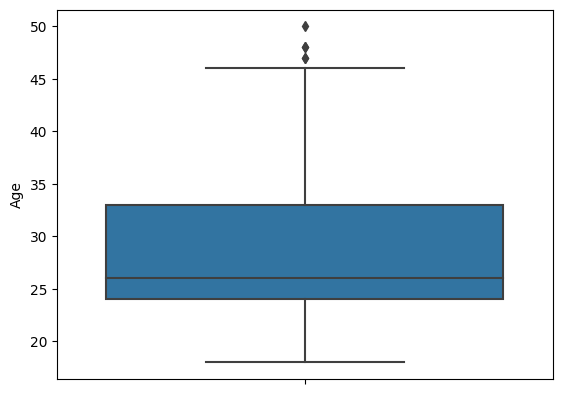

In [9]:
#box plot of Age
sns.boxplot(data=aerofit,y='Age')

<Axes: xlabel='Age', ylabel='Count'>

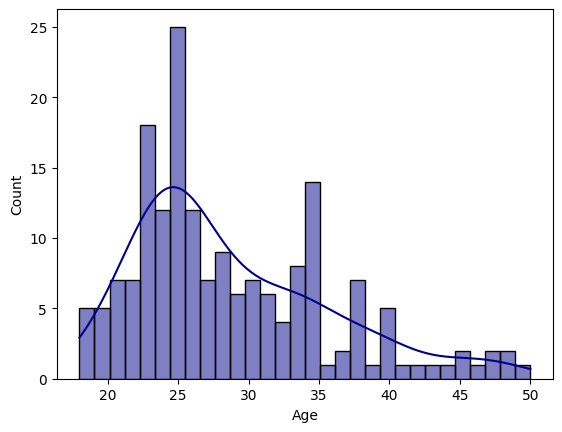

In [10]:
#Find out the distribution of Age
sns.histplot(data=aerofit,x='Age', bins=30, kde=True,color = 'darkblue')

<Axes: xlabel='Product', ylabel='Age'>

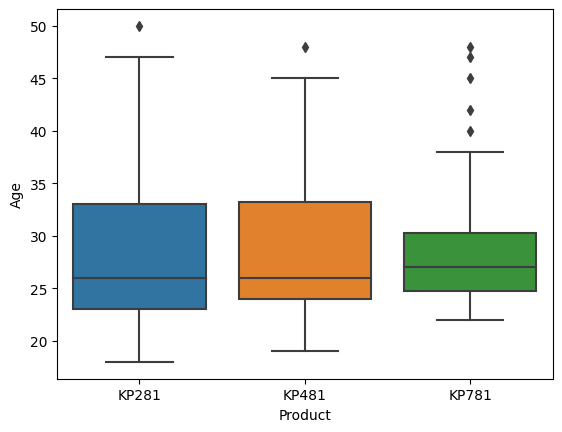

In [11]:
#Distribution of Age who bought different products
sns.boxplot(data=aerofit,y='Age',x='Product')

<Axes: xlabel='Age', ylabel='Count'>

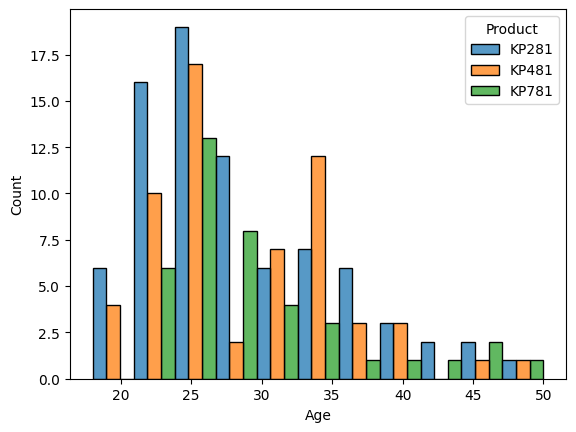

In [12]:
sns.histplot(data=aerofit,x='Age',hue='Product',multiple="dodge")

From the above charts we can see :<br>
For Mostly from 23 to 33 year old people bought **KP281** and **KP481**<br>
Whereas KP781 buyers are in age group of 23 to 30 years<br>

In [13]:
#analysis for education
aerofit['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [14]:
aerofit['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [15]:
#calculating IQR
Education_quartiles = aerofit['Education'].quantile([0.25, 0.75])
education_iqr = Education_quartiles[0.75] - Education_quartiles[0.25]
print(education_iqr)

2.0


In [16]:
#finding outliers
education_outliers=aerofit[(aerofit['Education']>Education_quartiles[0.75]+education_iqr*1.5) | (aerofit['Education']<Education_quartiles[0.25]-education_iqr*1.5)]
len(education_outliers)

4

Their are only 4 outliers in Education but they are different from age.

<Axes: ylabel='Education'>

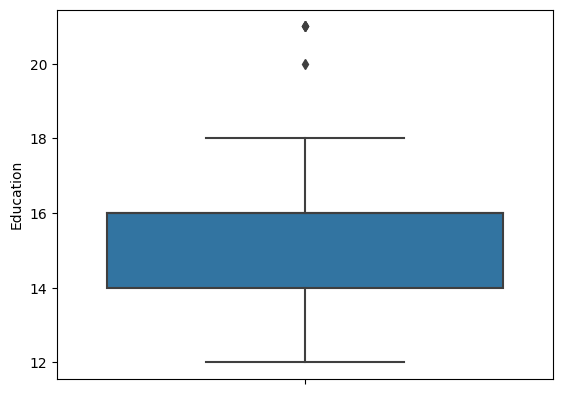

In [17]:
#boxplot of education
sns.boxplot(data=aerofit,y='Education')

<Axes: xlabel='Education', ylabel='Count'>

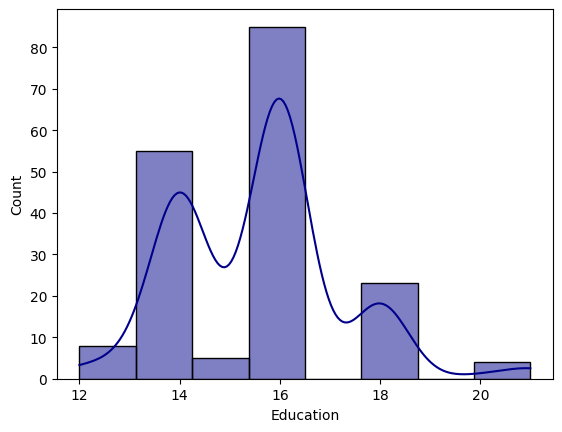

In [18]:
#Find out the distribution of Education
sns.histplot(data=aerofit,x='Education',bins=8,  kde=True,color = 'darkblue')

<Axes: xlabel='Product', ylabel='Education'>

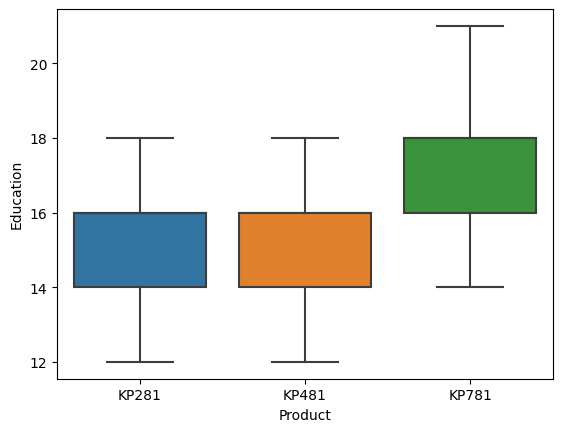

In [19]:
#Analysis of Education who bought different products
sns.boxplot(data=aerofit,y='Education',x='Product')


<Axes: xlabel='Education', ylabel='Count'>

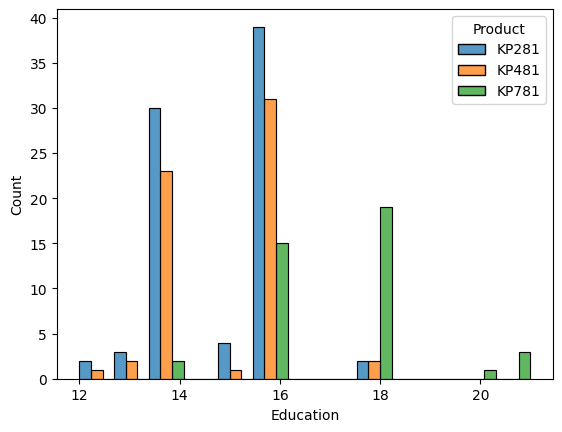

In [20]:
sns.histplot(data=aerofit,x='Education',hue='Product',multiple="dodge")

From the above Analysis we can conclude:<br>
**KP281** and **KP481** buyers have education between 14 to 16 years<br>
Whwereas KP781 buyers have education more than 16 years<br>

In [21]:
#analysis for Income
aerofit['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [22]:
#calculating IQR
Income_quartiles = aerofit['Income'].quantile([0.25, 0.75])
income_iqr = Income_quartiles[0.75] - Income_quartiles[0.25]
print(income_iqr)

14609.25


In [23]:
#finding outliers in Income
income_outliers=aerofit[(aerofit['Income']>Income_quartiles[0.75]+income_iqr*1.5) | (aerofit['Income']<Income_quartiles[0.25]-income_iqr*1.5)]
income_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [24]:
len(income_outliers)

19

There are 19 outliers in Income column.

<Axes: ylabel='Income'>

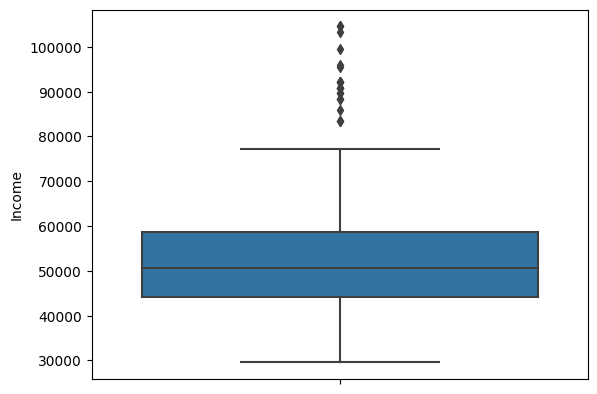

In [25]:
#boxplot of Income
sns.boxplot(data=aerofit,y='Income')

<Axes: xlabel='Income', ylabel='Count'>

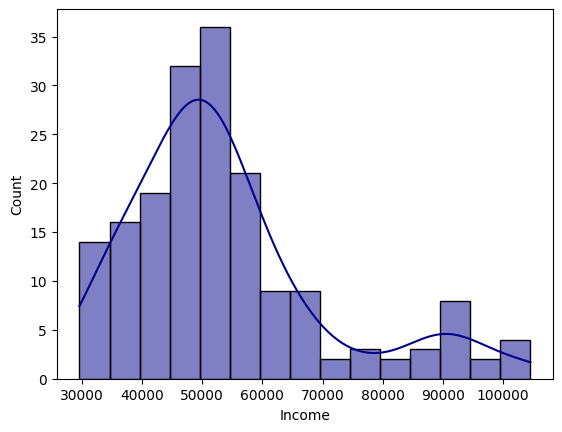

In [26]:
#Find out the distribution of Income
sns.histplot(data=aerofit,x='Income',bins=15,  kde=True,color = 'darkblue')

<Axes: xlabel='Product', ylabel='Income'>

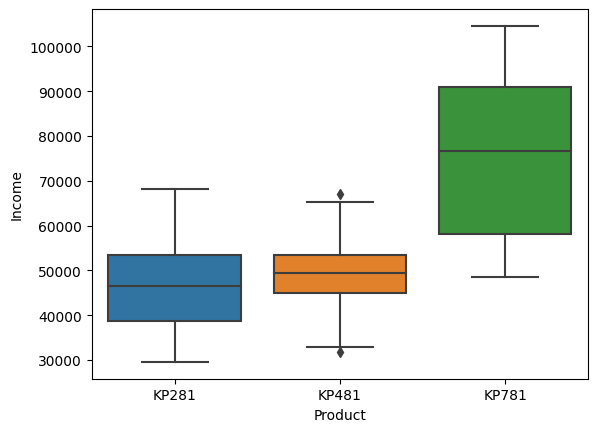

In [27]:
#Analysis of Income who bought different products
sns.boxplot(data=aerofit,y='Income',x='Product')


<Axes: xlabel='Income', ylabel='Count'>

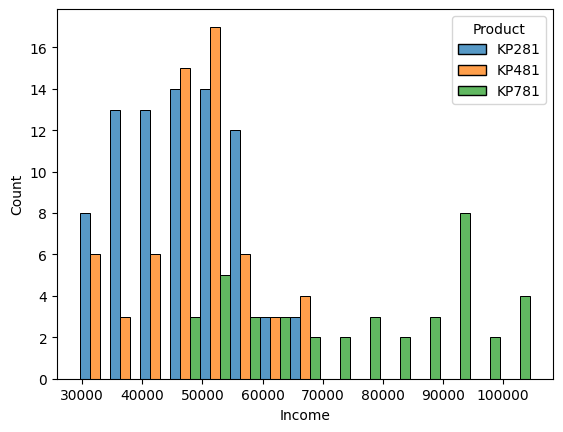

In [28]:
sns.histplot(data=aerofit,x='Income',hue='Product',multiple="dodge")

From the above charts we can see: <br>
Customers who bought **KP281** has income mostly between 4000 to 5500 <br>
Customers who bought **KP481** has income mostly between 4500 to 5500 <br>
Customers who bought **KP781** has income mostly greater than 5000 <br>

In [29]:
#analysis for Usage
aerofit['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [30]:
aerofit['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [31]:
#calculating IQR
Usage_quartiles = aerofit['Usage'].quantile([0.25, 0.75])
usage_iqr = Usage_quartiles[0.75] - Usage_quartiles[0.25]
print(usage_iqr)

1.0


In [32]:
#finding outliers
usage_outliers=aerofit[(aerofit['Usage']>Usage_quartiles[0.75]+usage_iqr*1.5) | (aerofit['Usage']<Usage_quartiles[0.25]-usage_iqr*1.5)]
len(usage_outliers)

9

Their are 9 outlier in usage column

<Axes: ylabel='Usage'>

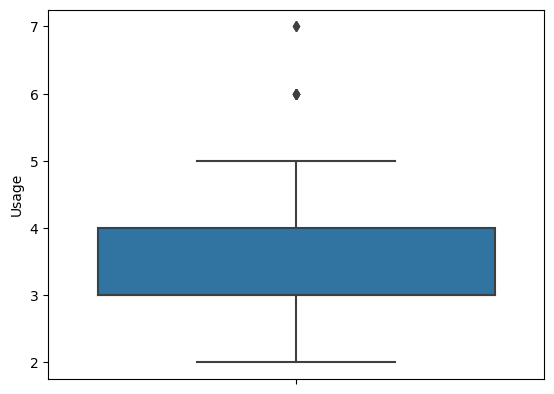

In [33]:
#box plot of Usage column
sns.boxplot(data=aerofit,y='Usage')

<Axes: xlabel='Usage', ylabel='Count'>

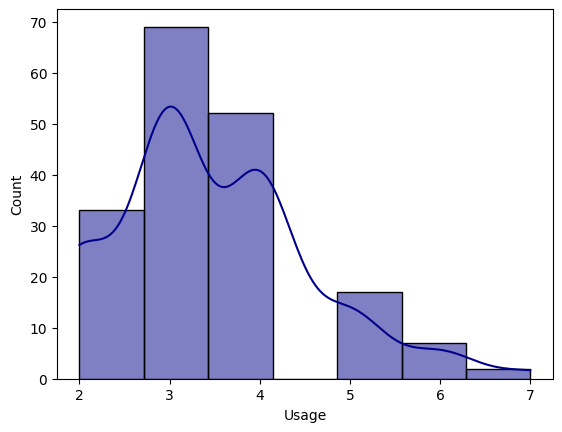

In [34]:
#Find out the distribution of Usage
sns.histplot(data=aerofit,x='Usage', bins=7, kde=True,color = 'darkblue')

<Axes: xlabel='Product', ylabel='Usage'>

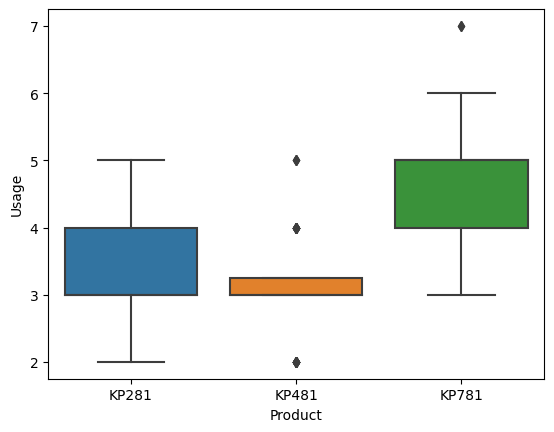

In [35]:
#Analysis of Usage who bought different products
sns.boxplot(data=aerofit,y='Usage',x='Product')


<Axes: xlabel='Usage', ylabel='Count'>

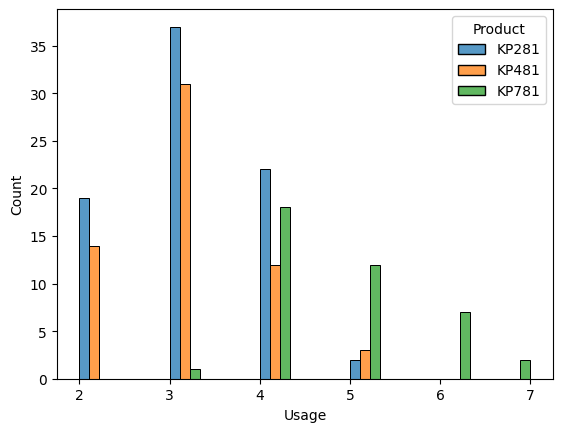

In [36]:
sns.histplot(data=aerofit,x='Usage',hue='Product',multiple="dodge")

From the analysis we can see:<br>
Customers who mostly use 2 to 4 times a week tends to buy **KP281** and **KP481**<br>
Customers who's usage is more than 4 in a week tend to buy **KP781**

In [37]:
#analysis for Fitness
aerofit['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

In [38]:
aerofit['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [39]:
#calculating IQR
Fitness_quartiles = aerofit['Fitness'].quantile([0.25, 0.75])
fitness_iqr = Fitness_quartiles[0.75] - Fitness_quartiles[0.25]
print(fitness_iqr)

1.0


In [40]:
#finding outliers in Fitness
fitness_outliers=aerofit[(aerofit['Fitness']>Fitness_quartiles[0.75]+fitness_iqr*1.5) | (aerofit['Fitness']<Fitness_quartiles[0.25]-fitness_iqr*1.5)]
len(fitness_outliers)

2

So there is 2 outlier in Fitness column

<Axes: ylabel='Fitness'>

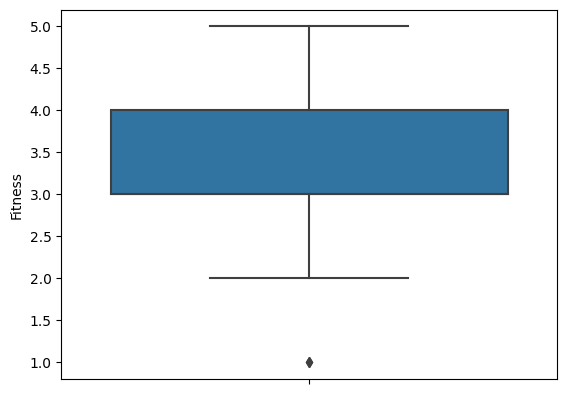

In [41]:
#boxplot of Fitness
sns.boxplot(data=aerofit,y='Fitness')

<Axes: xlabel='Fitness', ylabel='Count'>

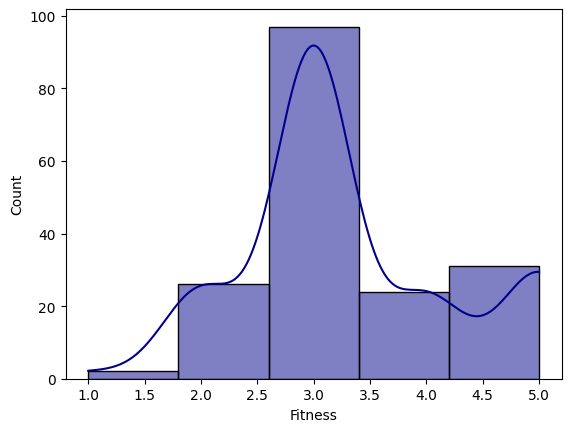

In [42]:
#Find out the distribution of Fitness
sns.histplot(data=aerofit,x='Fitness',bins=5,  kde=True,color = 'darkblue')

<Axes: xlabel='Fitness', ylabel='Count'>

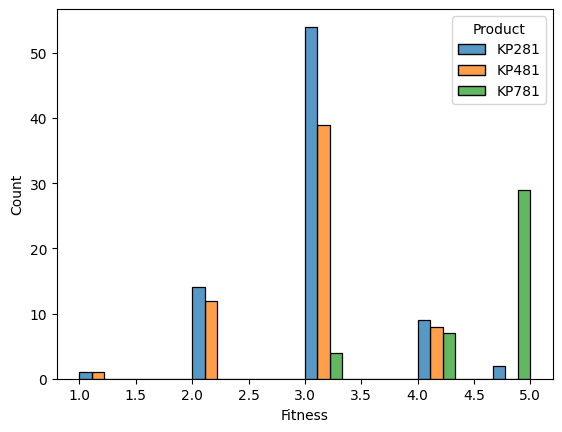

In [43]:
#Analysis of Fitness who bought different products
sns.histplot(data=aerofit,x='Fitness',hue='Product',multiple="dodge")


From the above charts we can see:<br>
Customers who have fitness level between 2 to 3, tend to buy KP281 and KP481<br>
Customers whos fitness level is more than 4 tend to buy KP781

In [44]:
#analysis for Miles
aerofit['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [45]:
#calculating IQR
Miles_quartiles = aerofit['Miles'].quantile([0.25, 0.75])
miles_iqr = Miles_quartiles[0.75] - Miles_quartiles[0.25]
print(miles_iqr)

48.75


In [46]:
#finding outliers in Miles
miles_outliers=aerofit[(aerofit['Miles']>Miles_quartiles[0.75]+miles_iqr*1.5) | (aerofit['Miles']<Miles_quartiles[0.25]-miles_iqr*1.5)]
len(miles_outliers)

13

In [47]:
miles_outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


<Axes: ylabel='Miles'>

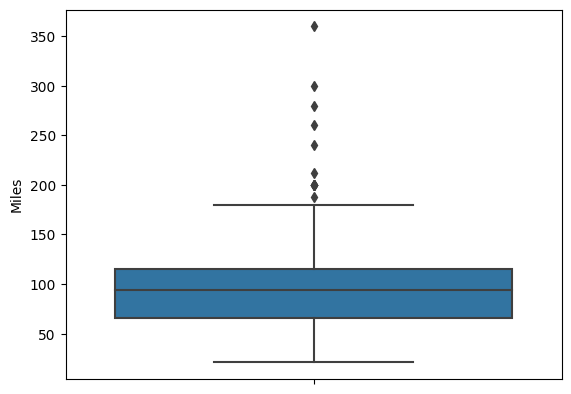

In [48]:
#boxplot of Miles
sns.boxplot(data=aerofit,y='Miles')

<Axes: xlabel='Miles', ylabel='Count'>

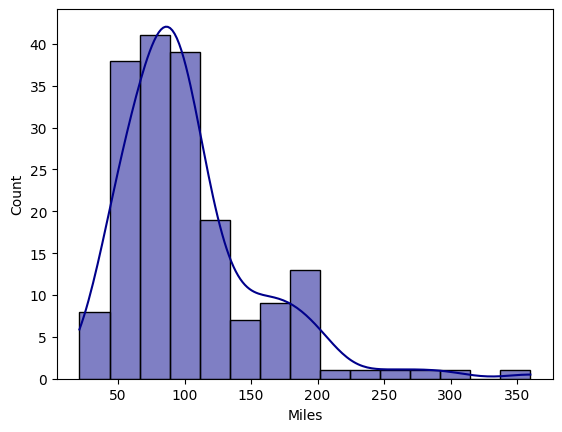

In [49]:
#Find out the distribution of Miles
sns.histplot(data=aerofit,x='Miles',bins=15,  kde=True,color = 'darkblue')

<Axes: xlabel='Product', ylabel='Miles'>

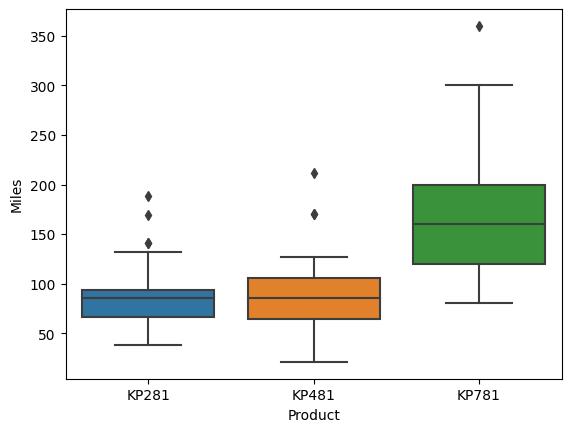

In [50]:
#Analysis of Miles who bought different products
sns.boxplot(data=aerofit,y='Miles',x='Product')


<Axes: xlabel='Miles', ylabel='Count'>

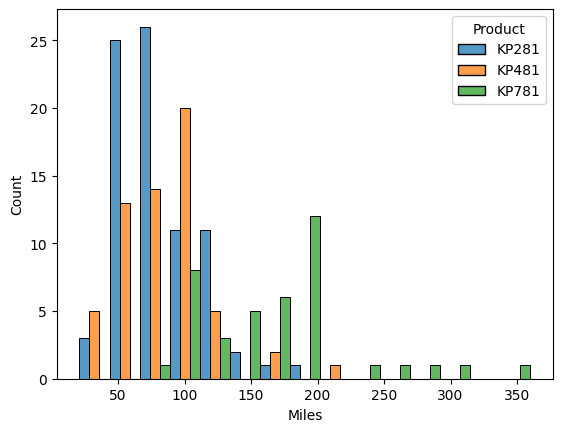

In [51]:
sns.histplot(data=aerofit,x='Miles',bins=15,hue='Product',multiple="dodge")

From the above charts we can see:<br>
Customers who bought **KP281**  runs/walks 50 to 100 Miles <br>
Customers who bought **KP481**  runs/walks 50 to 150 Miles <br>
Customers who bought **KP281**  runs/walks 100 to 200 Miles <br>

In [52]:
#analysis of Product
aerofit['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

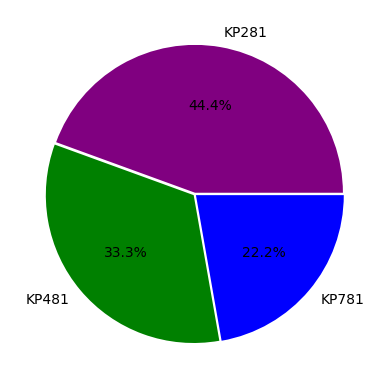

In [53]:
#analysis of Product
Product_aerofit=aerofit.groupby(['Product']).agg({'Product':'count'}).rename(columns={'Product':'Count'}).reset_index()
plt.pie(Product_aerofit['Count'],explode=(0.01,0.01,0.01), labels=Product_aerofit['Product'],colors=['purple','green','blue'],autopct='%.1f%%')
plt.show()

Arround 44% of customers bought KP281, arround 33 % customers bought KP481 and arround 22 % customers bought KP781

In [54]:
#analysis of Gender
aerofit['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

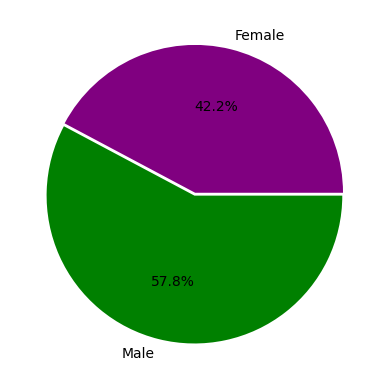

In [55]:
#analysis of Gender
gender_aerofit=aerofit.groupby(['Gender']).agg({'Gender':'count'}).rename(columns={'Gender':'Count'}).reset_index()
plt.pie(gender_aerofit['Count'],explode=(0.01,0.01), labels=gender_aerofit['Gender'],colors=['purple','green'],autopct='%.1f%%')
plt.show()

57.8 % customers are male and 42.2% customers are female

<Axes: xlabel='Product', ylabel='count'>

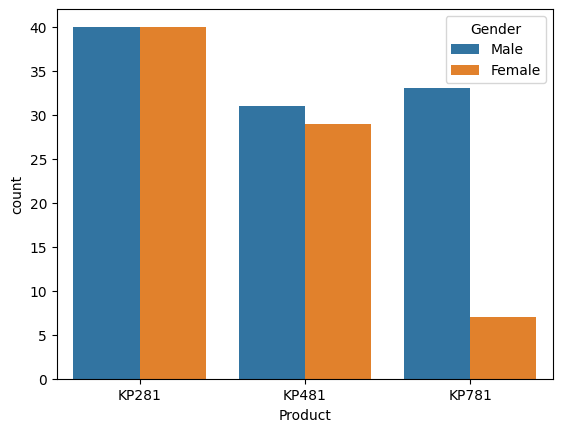

In [56]:
#Analysis of Gender on different products
sns.countplot(data=aerofit,x='Product',hue='Gender')

From the above charts we can see Females do not tends to buy **KP781** <br>
Whereas mens buys all most all 3 types of products.

In [57]:
#analysis of MaritalStatus
aerofit['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

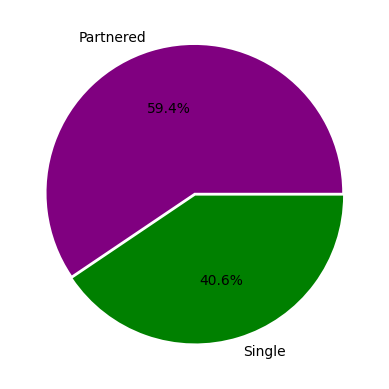

In [58]:
#analysis of MaritalStatus
MaritalStatus_aerofit=aerofit.groupby(['MaritalStatus']).agg({'MaritalStatus':'count'}).rename(columns={'MaritalStatus':'Count'}).reset_index()
plt.pie(MaritalStatus_aerofit['Count'],explode=(0.01,0.01), labels=MaritalStatus_aerofit['MaritalStatus'],colors=['purple','green'],autopct='%.1f%%')
plt.show()

59.4 % customers are partnered and 40.6% customers are single

<Axes: xlabel='Product', ylabel='count'>

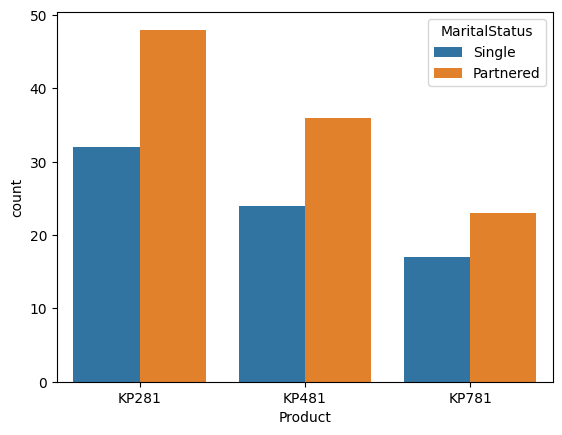

In [59]:
#Analysis of MaritalStatus on different products
sns.countplot(data=aerofit,x='Product',hue='MaritalStatus')

From the above charts we can see single and parterned both type of people by all 3 types of products but single people tends to buy less (all 3 types of product) as compaired to partnered people. But from product perspective their is no major impact of Marital Status.

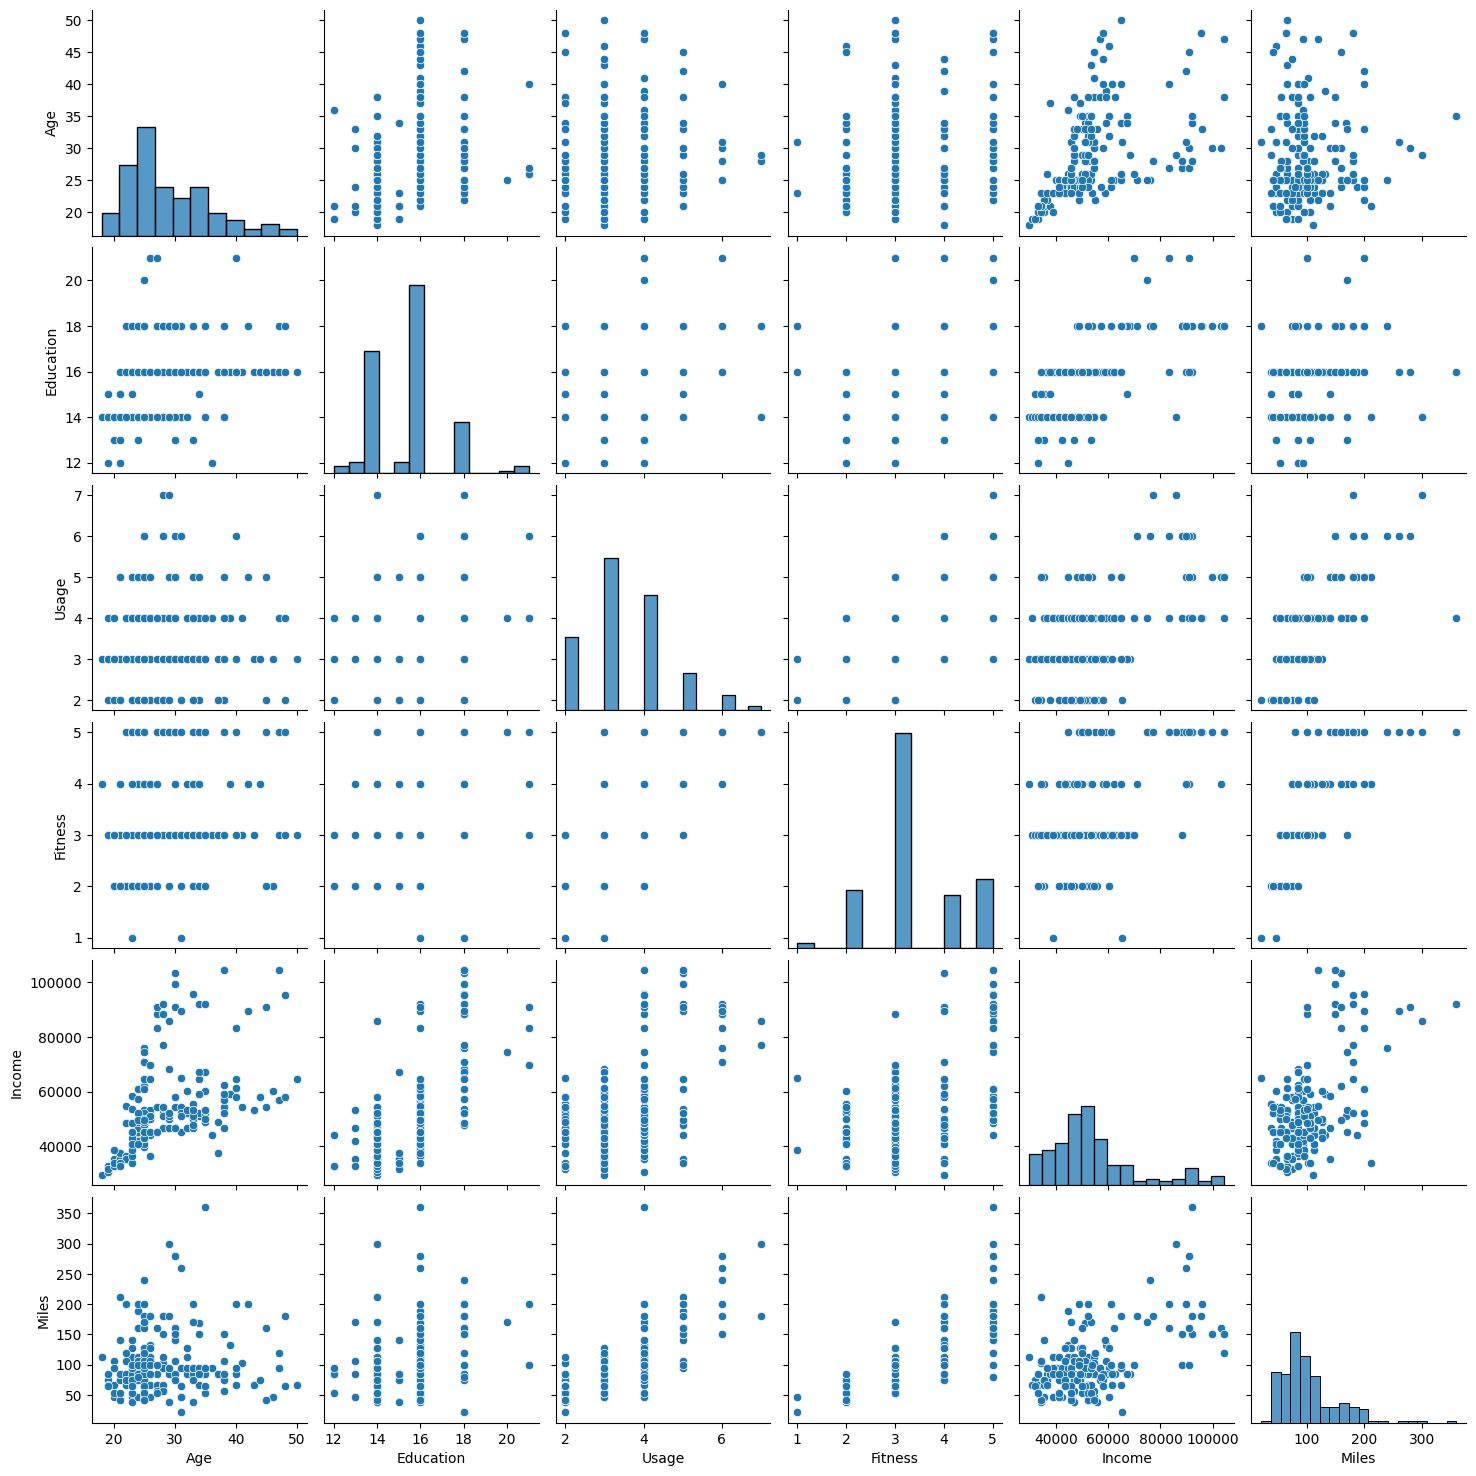

In [60]:
#An attempt to find out co-relation between neumarical columns using pairplot
sns.pairplot(data=aerofit)

In [61]:
#An attempt to find out co-relation between neumarical columns
corr=aerofit.corr()
corr

<ipython-input-61-ed8e4e1f2a3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=aerofit.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

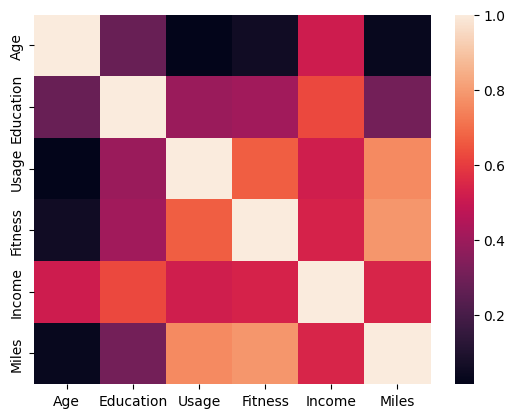

In [62]:
sns.heatmap(data=corr)

From the above analysis we can conclude **Fitness** column have some positive corelation with **Usage** and **Miles** column

In [63]:
#creating categories from Age,Income,Miles
aerofit['Age_category']=aerofit['Age'].apply(lambda x: "Bellow 24" if x<24 else("Between 24 to 33" if x>=24 and x<=33 else "Above 33"))
aerofit['Income_category']=aerofit['Income'].apply(lambda x: "Low Income" if x<40000 else("Mid Income" if x>=40000 and x<=60000 else "High Income"))
aerofit['Miles_category']=aerofit['Miles'].apply(lambda x: "Low" if x<66 else("Mid" if x>=66 and x<=125 else "High"))
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_category,Income_category,Miles_category
0,KP281,18,Male,14,Single,3,4,29562,112,Bellow 24,Low Income,Mid
1,KP281,19,Male,15,Single,2,3,31836,75,Bellow 24,Low Income,Mid
2,KP281,19,Female,14,Partnered,4,3,30699,66,Bellow 24,Low Income,Mid
3,KP281,19,Male,12,Single,3,3,32973,85,Bellow 24,Low Income,Mid
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bellow 24,Low Income,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Above 33,High Income,High
176,KP781,42,Male,18,Single,5,4,89641,200,Above 33,High Income,High
177,KP781,45,Male,16,Single,5,5,90886,160,Above 33,High Income,High
178,KP781,47,Male,18,Partnered,4,5,104581,120,Above 33,High Income,Mid


In [64]:
#calculating marginal probability
pd.crosstab(aerofit['Product'],aerofit['Age_category'],margins=True)

Age_category,Above 33,Bellow 24,Between 24 to 33,All
Product,,,,
KP281,19,22,39,80
KP481,15,14,31,60
KP781,8,6,26,40
All,42,42,96,180


In [65]:
pd.crosstab(aerofit['Product'],aerofit['Age_category'],margins=True,normalize='columns')

Age_category,Above 33,Bellow 24,Between 24 to 33,All
Product,,,,
KP281,0.452381,0.523810,0.406250,0.444444
KP481,0.357143,0.333333,0.322917,0.333333
KP781,0.190476,0.142857,0.270833,0.222222


From Age analysis we can see probability of buying a product given an age group is all most similar.

In [66]:
pd.crosstab(aerofit['Product'],aerofit['Income_category'],margins=True)

Income_category,High Income,Low Income,Mid Income,All
Product,,,,
KP281,6,23,51,80
KP481,7,9,44,60
KP781,29,0,11,40
All,42,32,106,180


In [67]:
pd.crosstab(aerofit['Product'],aerofit['Income_category'],margins=True,normalize='columns')

Income_category,High Income,Low Income,Mid Income,All
Product,,,,
KP281,0.142857,0.71875,0.481132,0.444444
KP481,0.166667,0.28125,0.415094,0.333333
KP781,0.690476,0.00000,0.103774,0.222222


From the analysis of Income we can see High income people have higher tendency to buy **KP781** whereas low income people tend to buy **KP281** which is because **KP281** is cheapest and **KP781** is most expensive.<br>
In case of Mid Income people , They tend to buy **KP281** and **KP481**, a small portion of Mid income people bought **KP781**

In [68]:
pd.crosstab(aerofit['Product'],aerofit['Miles_category'],margins=True)

Miles_category,High,Low,Mid,All
Product,,,,
KP281,6,18,56,80
KP481,8,18,34,60
KP781,28,0,12,40
All,42,36,102,180


In [69]:
pd.crosstab(aerofit['Product'],aerofit['Miles_category'],margins=True,normalize='columns')

Miles_category,High,Low,Mid,All
Product,,,,
KP281,0.142857,0.5,0.549020,0.444444
KP481,0.190476,0.5,0.333333,0.333333
KP781,0.666667,0.0,0.117647,0.222222


From the analysis of Miles we can see High Mile people have higher tendency to buy **KP781** whereas low mile people tend to buy **KP281**.<br>
In case of Mid mile people , They tend to buy **KP281** and **KP481**, a small portion of Mid mile people bought **KP781**

In [70]:
pd.crosstab(aerofit['Product'],aerofit['Fitness'],margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [71]:
pd.crosstab(aerofit['Product'],aerofit['Fitness'],margins=True,normalize='columns')

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516,0.444444
KP481,0.5,0.461538,0.402062,0.333333,0.000000,0.333333
KP781,0.0,0.000000,0.041237,0.291667,0.935484,0.222222


From the analysis of Fitness we can see High Fitness people have higher tendency to buy **KP781** whereas low Fitness people tend to buy **KP281**.<br>
In case of Mid Fitness people , They tend to buy **KP281** and **KP481**, a small portion of Mid Fitness people bought **KP781**

In [72]:
pd.crosstab(aerofit['Product'],aerofit['Usage'],margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


In [73]:
pd.crosstab(aerofit['Product'],aerofit['Usage'],margins=True,normalize='columns')

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0,0.444444
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0,0.333333
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0,0.222222


From the analysis of Usage we can see  people who use more than 4 times a week have higher tendency to buy **KP781** whereas  people who use less than 3 times a week tend to buy **KP281** and **KP481**.<br>
In case of  people who use 3 to 5 time a week , They tend to buy **KP281** and **KP481**, a small portion  people who use 3 to 5 time a week bought **KP781**

In [74]:
pd.crosstab(aerofit['Product'],aerofit['Education'],margins=True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


In [75]:
pd.crosstab(aerofit['Product'],aerofit['Education'],margins=True,normalize='columns')

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0,0.444444
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0,0.333333
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0,0.222222


From the analysis of Education we can see Highly Educated people have higher tendency to buy **KP781** whereas less educated people tend to buy **KP281**.<br>
In case of Miduam educated people , They tend to buy **KP281** and **KP481**, a small portion of Miduam educated people bought **KP781**

In [76]:
pd.crosstab(aerofit['Product'],aerofit['Gender'],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [77]:
pd.crosstab(aerofit['Product'],aerofit['Gender'],margins=True,normalize='columns')

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


Here we can see Females are tends to buy **KP281** but males buy allmost all 3 products in equal proportion.

In [78]:
pd.crosstab(aerofit['Product'],aerofit['MaritalStatus'],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [79]:
pd.crosstab(aerofit['Product'],aerofit['MaritalStatus'],margins=True,normalize='columns')

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


Here we can see Marital Status does not impact on buying pattern of customers.

In [80]:
pd.crosstab(aerofit['Product'],[aerofit['Age_category'],aerofit['Miles_category']],margins=True)

Age_category   Above 33         Bellow 24         Between 24 to 33          \
Miles_category     High Low Mid      High Low Mid             High Low Mid   
Product                                                                      
KP281                 2   3  14         1   3  18                3  12  24   
KP481                 0   5  10         2   6   6                6   7  18   
KP781                 7   0   1         2   0   4               19   0   7   
All                   9   8  25         5   9  28               28  19  49   

Age_category    All  
Miles_category       
Product              
KP281            80  
KP481            60  
KP781            40  
All             180

In [81]:
pd.crosstab(aerofit['Product'],[aerofit['Age_category'],aerofit['Miles_category']],margins=True,normalize='columns')

Age_category    Above 33              Bellow 24                      \
Miles_category      High    Low   Mid      High       Low       Mid   
Product                                                               
KP281           0.222222  0.375  0.56       0.2  0.333333  0.642857   
KP481           0.000000  0.625  0.40       0.4  0.666667  0.214286   
KP781           0.777778  0.000  0.04       0.4  0.000000  0.142857   

Age_category   Between 24 to 33                           All  
Miles_category             High       Low       Mid            
Product                                                        
KP281                  0.107143  0.631579  0.489796  0.444444  
KP481                  0.214286  0.368421  0.367347  0.333333  
KP781                  0.678571  0.000000  0.142857  0.222222

**KP781** exhibits different preference patterns based on age and miles categories. It has the highest preference among individuals in the Above 33 age category. In terms of miles categories, **KP781** has the highest preference in the High category, followed by the Mid and Low categories.<br>
**KP481** shows a varied preference pattern based on age and miles categories. It has higher preference among individuals in the Above 33 and Below 24 age categories. In terms of miles categories, **KP481** has the highest preference in the Low category, followed by the Mid and High categories.<br>
 **KP281** seems to have relatively consistent preference across different age categories. It shows a higher preference among individuals in the Below 24 and Between 24 to 33 age categories. In terms of miles categories, **KP281** has the highest preference in the Mid category, followed by the High and Low categories.

In [82]:
pd.crosstab(aerofit['Product'],[aerofit['Age_category'],aerofit['Income_category']],margins=True)

Age_category       Above 33                        Bellow 24             \
Income_category High Income Low Income Mid Income Low Income Mid Income   
Product                                                                   
KP281                     5          1         13         20          2   
KP481                     5          0         10          9          5   
KP781                     8          0          0          0          6   
All                      18          1         23         29         13   

Age_category    Between 24 to 33                        All  
Income_category      High Income Low Income Mid Income       
Product                                                      
KP281                          1          2         36   80  
KP481                          2          0         29   60  
KP781                         21          0          5   40  
All                           24          2         70  180

In [83]:
pd.crosstab(aerofit['Product'],[aerofit['Age_category'],aerofit['Income_category']],margins=True,normalize='columns')

Age_category       Above 33                        Bellow 24             \
Income_category High Income Low Income Mid Income Low Income Mid Income   
Product                                                                   
KP281              0.277778        1.0   0.565217   0.689655   0.153846   
KP481              0.277778        0.0   0.434783   0.310345   0.384615   
KP781              0.444444        0.0   0.000000   0.000000   0.461538   

Age_category    Between 24 to 33                             All  
Income_category      High Income Low Income Mid Income            
Product                                                           
KP281                   0.041667        1.0   0.514286  0.444444  
KP481                   0.083333        0.0   0.414286  0.333333  
KP781                   0.875000        0.0   0.071429  0.222222

**KP781** exhibits different preference patterns based on age and income categories. It has the highest preference among Above 33 individuals, regardless of income category. Among the age categories, **KP781** shows lower preference among Below 24 individuals. In terms of income categories, **KP781** has a higher preference among Low Income and Mid Income individuals.<br>
**KP481** shows a relatively consistent preference across age categories, with similar values for Above 33, Below 24, and Between 24 to 33. Among the income categories, **KP481** has higher preference among Low Income and Mid Income individuals.<br>
Among the three products, **KP281** seems to have relatively consistent preference across different age categories. It shows a higher preference among Low Income and Mid Income individuals, especially in the Below 24 and Between 24 to 33 age categories.

In [84]:
pd.crosstab(aerofit['Product'],[aerofit['Income_category'],aerofit['Miles_category']],margins=True)

Income_category High Income         Low Income         Mid Income          All
Miles_category         High Low Mid       High Low Mid       High Low Mid     
Product                                                                       
KP281                     0   1   5          1   3  19          5  14  32   80
KP481                     1   1   5          1   4   4          6  13  25   60
KP781                    23   0   6          0   0   0          5   0   6   40
All                      24   2  16          2   7  23         16  27  63  180

In [85]:
pd.crosstab(aerofit['Product'],[aerofit['Income_category'],aerofit['Miles_category']],margins=True,normalize='columns')

Income_category High Income              Low Income                      \
Miles_category         High  Low     Mid       High       Low       Mid   
Product                                                                   
KP281              0.000000  0.5  0.3125        0.5  0.428571  0.826087   
KP481              0.041667  0.5  0.3125        0.5  0.571429  0.173913   
KP781              0.958333  0.0  0.3750        0.0  0.000000  0.000000   

Income_category Mid Income                           All  
Miles_category        High       Low       Mid            
Product                                                   
KP281               0.3125  0.518519  0.507937  0.444444  
KP481               0.3750  0.481481  0.396825  0.333333  
KP781               0.3125  0.000000  0.095238  0.222222

**KP781** has the highest preference in the High Income category, with a significantly higher value compared to the other income categories. In the miles categories, **KP781** shows higher preference in the Low and Mid categories compared to the High category.<br>
**KP481** appears to have a relatively balanced preference across income categories, with similar values for all three income groups. Among the miles categories, **KP481** shows higher preference in the Low and Mid categories compared to the High category.<br>
Among the three products, KP281 seems to be preferred by customers across all income categories. The highest preference for **KP281** is observed in the High Income category.


In [86]:
pd.crosstab(aerofit['Product'],[aerofit['Gender'],aerofit['Income_category']],margins=True)

Gender               Female                              Male             \
Income_category High Income Low Income Mid Income High Income Low Income   
Product                                                                    
KP281                     4         13         23           2         10   
KP481                     4          2         23           3          7   
KP781                     5          0          2          24          0   
All                      13         15         48          29         17   

Gender                      All  
Income_category Mid Income       
Product                          
KP281                   28   80  
KP481                   21   60  
KP781                    9   40  
All                     58  180

In [87]:
pd.crosstab(aerofit['Product'],[aerofit['Gender'],aerofit['Income_category']],margins=True,normalize='columns')

Gender               Female                              Male             \
Income_category High Income Low Income Mid Income High Income Low Income   
Product                                                                    
KP281              0.307692   0.866667   0.479167    0.068966   0.588235   
KP481              0.307692   0.133333   0.479167    0.103448   0.411765   
KP781              0.384615   0.000000   0.041667    0.827586   0.000000   

Gender                           All  
Income_category Mid Income            
Product                               
KP281             0.482759  0.444444  
KP481             0.362069  0.333333  
KP781             0.155172  0.222222

**KP781** exhibits different preference patterns based on gender and income categories. It has the highest preference among females, regardless of income category. Among males, **KP781** has a higher preference among high-income individuals. Overall, **KP781** exhibits a significantly higher preference among females compared to males.<br>
**KP481** shows a varied preference pattern based on gender and income categories. It has a relatively consistent preference among females, regardless of income category. However, among males, **KP481** has a higher preference among low-income individuals. Overall, **KP481** exhibits higher preference among females compared to males.<br>
Among the three products, **KP281** seems to have relatively consistent preference across different genders. It shows a higher preference among both females and males. In terms of income categories, **KP281** has the highest preference among low-income males and mid-income females.

**<h1>Based on the above analysis, here are actionable insights<h1>**

For the sake of simplicity of the analysis  :<br>
*   Miles below 66 is considered as Low mile, 66 to 125 mile is considered as Mid mile and  above 66 miles is considered as High mile
*   Income less than 40000 is considered as low income , Income between  40000 to 60000 considered as Mid income and Income more than 60000 is considered as High income



**<h2>Actionable insights: <h2>**

1. **Target Above 33 Age Category for KP781**: Since KP781 has the highest preference among individuals above the age of 33, focus your sales efforts on this age group. Develop targeted marketing campaigns that highlight the features, benefits, and value proposition of KP781 that resonate with the preferences and needs of customers in this age category.

2. **Promote High Miles Category for KP781**: Highlight the advantages of KP781 in the high miles category. Showcase how the product meets the requirements and demands of customers who engage in high-mileage activities. Emphasize its durability, and long-term cost-effectiveness to attract potential buyers.

3. **Focus on High Income Category for KP781**: Since KP781 has the highest preference in the High Income category, allocate resources to target customers in this income group. Highlight the premium features, quality, and exclusivity associated with KP781 to attract high-income customers. Position it as a desirable and aspirational choice in the high-end market segment.

4. **Capitalize on Varied Preference Patterns for KP481**: Since KP481 exhibits varied preference patterns based on age and miles categories, target individuals in the Above 33 and Below 24 age and low and mid mile categories. Develop targeted marketing strategies that address the unique needs and preferences of these age groups. Promote the benefits and features of KP481 that align with the low miles category to attract customers seeking a reliable and efficient option for their lower treadmill needs.

5. **Leverage Consistent Preference across Genders for KP281**: Utilize the consistent preference of KP281 among both females and males. Develop marketing strategies and campaigns that appeal to a broad customer base, highlighting the product's versatility, performance, and affordability. Position KP281 as a reliable and attractive entry point of treadmeal for customers of all genders.

6. **Highlight Consistent Preference for KP281**: Leverage the consistent preference for KP281 across different age categories, especially among individuals in the Below 24 and Between 24 to 33 age and low to mid income categories. Develop marketing campaigns that emphasize the product's appeal to these age and income groups, focusing on its features, affordability, and suitability for both low-income and mid-income individuals.

7. **Target Females for KP781 and KP481**: Given the significantly higher preference among females for KP781 and KP481, tailor your sales and marketing efforts to appeal to female customers. Understand their specific needs, preferences, and pain points, and develop targeted campaigns that highlight how KP781 and KP481 cater to their requirements. Focus on features and benefits that resonate with female customers.